# **ML IA 2- Fake news detection**

Group No. 6

Team members:

*   Purvi Harniya, 1814023 
*   Neelay Jagani, 1814024
*   Esha Gupta, 1814025

Dataset used - ISOT Dataset - https://drive.google.com/drive/folders/11DVh7akpXvzakGhVdGhBQR_kfsDdbmNZ?usp=sharing  
Dataset's official link- https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php <br>
Algorithmic comparison - Logistic regression, lstm, cnn, ADA, PAC, XGBoost, Random Forest, BERT, Naive Bayes, Decision Tree, SVM



## Importing the required libraries

In [ ]:
#dataset handling and operations
from google.colab import drive  
import re,string,unicodedata
import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')
from wordcloud import WordCloud, STOPWORDS 

#nlp pre-processing
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet 

#vectorizers and splitting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,naive_bayes
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier 

#metrics 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix,precision_score,f1_score,recall_score,plot_roc_curve

#for rnn-lstm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Loading the datasets from Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/fakenews/

/content/drive/My Drive/fakenews


In [ ]:
!ls

Fake.csv  True.csv


## Reading the input CSV files

In [ ]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
true_df.shape

(21417, 4)

In [ ]:
fake_df.sample(5)

,title,text,subject,date
9458,TRUMP REPORTEDLY Thinking About Replacing Jeff...,"Hillary Clinton, Barack Obama, Eric Holder and...",politics,"Nov 11, 2017"
8866,Cruz Dedicates Empty Seat At State Of The Uni...,"Yesterday, President Barack Obama made a touch...",News,"January 9, 2016"
10390,FLASHBACK: ARMY OF WOMEN Join Social Media Cra...,President Trump and his daughter Ivanka are ge...,politics,"Jul 16, 2017"
15809,MUST WATCH VIDEO: LISTEN TO OBAMA AND HIS COMM...,OBAMA SPEAKS ABOUT FRANK AND HIS MENTOR WHO SC...,politics,"Apr 19, 2015"
9041,"Tired Of Things Going Well, Marco Rubio Makes...",Listening to several of the Republican candida...,News,"January 1, 2016"


In [ ]:
true_df.sample(5)

,title,text,subject,date
8687,China upset by U.S. Republican platform on Sou...,BEIJING (Reuters) - China’s Foreign Ministry o...,politicsNews,"July 21, 2016"
7371,"U.S. voters say yes to big bond issues, mixed ...",(Reuters) - U.S. voters on Tuesday favored a s...,politicsNews,"November 9, 2016"
14355,Gerry Adams to step down in end of an era for ...,"DUBLIN (Reuters) - Sinn Fein s Gerry Adams, a ...",worldnews,"November 18, 2017"
1462,Rich would benefit most from Trump tax cut pla...,WASHINGTON (Reuters) - The wealthiest American...,politicsNews,"September 29, 2017"
18967,U.S. welcomes royal order to allow Saudi women...,WASHINGTON (Reuters) - The United States on Tu...,worldnews,"September 26, 2017"


## Checking for null values

In [ ]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Dropping the unrequired columns 

In [ ]:
fake_df.drop(['subject','date'],axis=1,inplace=True)

In [ ]:
true_df.drop(['subject','date'],axis=1,inplace=True)

## Checking the distribution of fake news vs true news

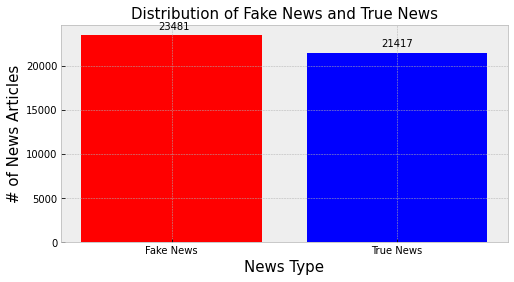

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('True News', len(true_df), color='blue')
plt.title('Distribution of Fake News and True News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.annotate(len(fake_df), # this is the text
                (0.01,23000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.annotate(len(true_df), # this is the text
                (1,21000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.show()

## Concatenating the title and text columns

In [ ]:
fake_df['news'] = fake_df['title'] + fake_df['text']
fake_df['label'] = 0
fake_df.drop(['title','text'], axis=1, inplace=True)

In [ ]:
true_df['news'] = true_df['title'] + true_df['text']
true_df['label'] = 1
true_df.drop(['title','text'], axis=1, inplace=True)

In [ ]:
fake_df.sample(2)

,news,label
7059,WATCH: New Yorkers Send Donald Trump A POWERF...,0
21296,LIBERAL LUNACY: A Real Tom Turkey You’ll Get A...,0


In [ ]:
true_df.sample(2)

,news,label
11703,"Turkey says U.S. isolated on Jerusalem, issuin...",1
8387,Tech firms' encryption foe struggles for U.S. ...,1


## Visualizing the news using wordcloud

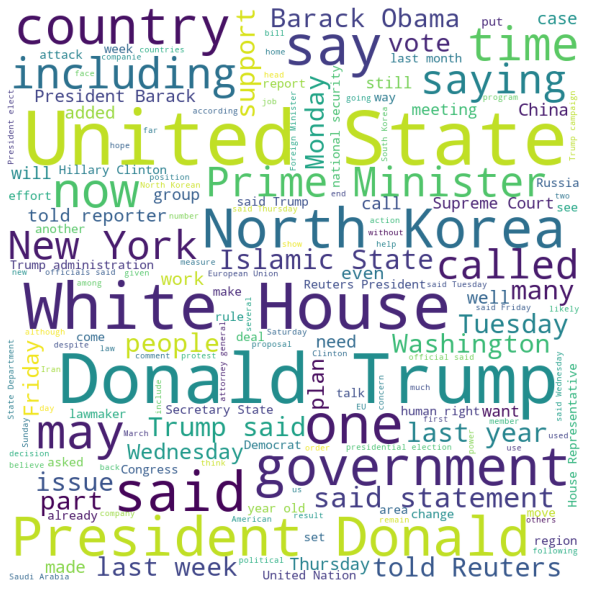

In [ ]:
stopwords = set(STOPWORDS) 

words_li_true = list(true_df['news'])
string_of_words_true = " ".join(words_li_true)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_true) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

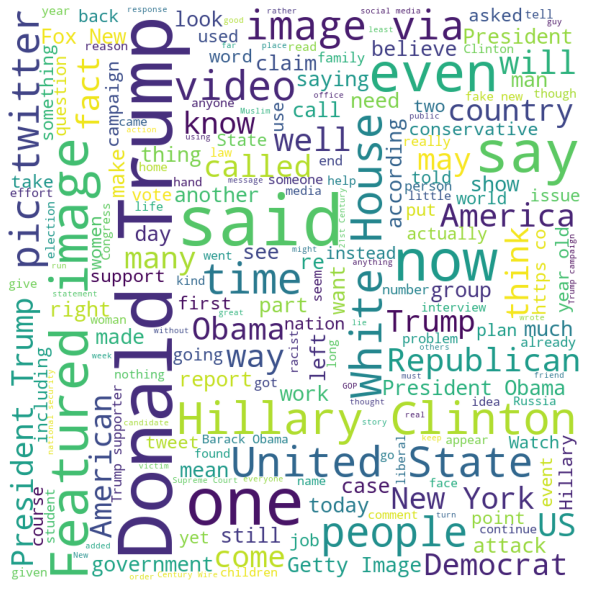

In [ ]:
words_li_fake = list(fake_df['news'])
string_of_words_fake = " ".join(words_li_fake)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_fake) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Concatenating the true and fake news datasets

In [ ]:
df = pd.concat([fake_df, true_df], ignore_index=True, sort=False)

In [ ]:
df.sample(5)

,news,label
33022,"Obama: US, Nordic nations agree sanctions agai...",1
14119,WATCH: FRATERNITY BROTHERS BUILD “Make America...,0
19795,ROSEANNE BARR PAID HIGH PRICE For Crossing Hil...,0
27889,Hillary Clinton calls for U.S. to bomb Syrian ...,1
28310,Puerto Rico governor aims to pare cuts at publ...,1


## Using NLP to pre-process the news text

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #try with stemming
        
    df.loc[index,'news'] = filter_sentence

In [ ]:
df.sample(5)

,news,label
36345,man palestinian flag smash jewish restaurant ...,1
13520,she grew up believing blacks could only suppo...,0
9618,did hillary clinton really break her toe vide...,0
30066,obama sign defense spending bill criticizes g...,1
44392,fbi say witness us probe malaysias 1mdb fear ...,1


In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(df['news'])
freq_term_matrix = count_vectorizer.transform(df['news'])
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

## Splitting the dataset into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, df['label'], random_state=0)

## Logistic Regression

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions_lr=logistic_regression.predict(X_test)

print("LOGISTIC REGRESSION: PERFORMANCE METRICS\n\n")

accuracy_logistic = accuracy_score(y_test, predictions_lr)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

precision_logistic = precision_score(y_test, predictions_lr, average=None)
print("Precision: %.2f%%" % (precision_logistic[1] * 100.0))

f1score_logistic= f1_score(y_test, predictions_lr, average=None)
print("F1 Score: %.2f%%" % (f1score_logistic[1] * 100.0))

recall_logistic = recall_score(y_test, predictions_lr, average=None)
print("Recall: %.2f%%" % (recall_logistic[1] * 100.0))

LOGISTIC REGRESSION: PERFORMANCE METRICS


Accuracy: 98.80%
Precision: 98.69%
F1 Score: 98.74%
Recall: 98.78%



Confusion matrix, without normalization
[[5806   70]
 [  65 5284]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


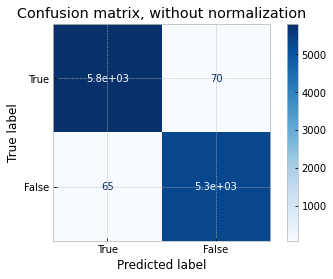

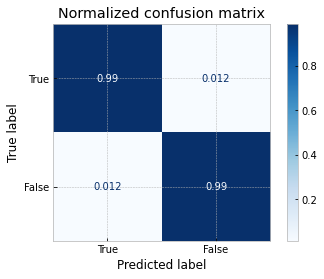

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## ADA

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada_classifier = abc.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
predictions_ada = ada_classifier.predict(X_test)

print("ADA BOOT CLASSIFIER: PERFORMANCE METRICS\n\n")

accuracy_ada = accuracy_score(y_test, predictions_ada)
print("Accuracy: %.2f%%" % (accuracy_ada * 100.0))

precision_ada = precision_score(y_test, predictions_ada, average=None)
print("Precision: %.2f%%" % (precision_ada[1] * 100.0))

f1score_ada = f1_score(y_test, predictions_ada, average=None)
print("F1 Score: %.2f%%" % (f1score_ada[1] * 100.0))

recall_ada = recall_score(y_test, predictions_ada, average=None)
print("Recall: %.2f%%" % (recall_ada[1] * 100.0))

ADA BOOT CLASSIFIER: PERFORMANCE METRICS


Accuracy: 98.82%
Precision: 98.77%
F1 Score: 98.77%
Recall: 98.77%



Confusion matrix, without normalization
[[5810   66]
 [  66 5283]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


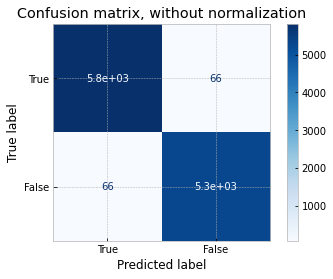

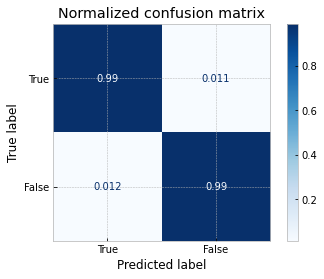

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ada_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## PAC

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac_classifier = pac.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
predictions_pac = pac_classifier.predict(X_test)

print("PASSIVE AGGRESSIVE CLASSIFIER: PERFORMANCE METRICS\n\n")

accuracy_pac = accuracy_score(y_test, predictions_pac)
print("Accuracy: %.2f%%" % (accuracy_pac * 100.0))

precision_pac = precision_score(y_test, predictions_pac, average=None)
print("Precision: %.2f%%" % (precision_pac[1] * 100.0))

f1score_pac = f1_score(y_test, predictions_pac, average=None)
print("F1 Score: %.2f%%" % (f1score_pac[1] * 100.0))

recall_pac = recall_score(y_test, predictions_pac, average=None)
print("Recall: %.2f%%" % (recall_pac[1] * 100.0))

PASSIVE AGGRESSIVE CLASSIFIER: PERFORMANCE METRICS


Accuracy: 99.54%
Precision: 99.46%
F1 Score: 99.51%
Recall: 99.57%



Confusion matrix, without normalization
[[5847   29]
 [  23 5326]]

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


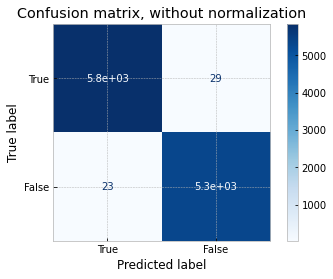

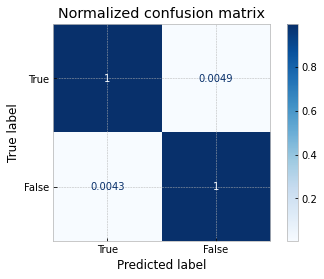

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pac_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## XGBoost

In [ ]:
xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions_xgb = xgb_classifier.predict(X_test)
predictions_xgbf = [round(value) for value in predictions_xgb]
# evaluate predictions

print("XG BOOST: PERFORMANCE METRICS\n\n")

accuracy_xgb = accuracy_score(y_test, predictions_xgbf)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

precision_xgb = precision_score(y_test, predictions_xgbf, average=None)
print("Precision: %.2f%%" % (precision_xgb[1] * 100.0))

f1score_xgb = f1_score(y_test, predictions_xgbf, average=None)
print("F1 Score: %.2f%%" % (f1score_xgb[1] * 100.0))

recall_xgb = recall_score(y_test, predictions_xgbf, average=None)
print("Recall: %.2f%%" % (recall_xgb[1] * 100.0))

XG BOOST: PERFORMANCE METRICS


Accuracy: 99.05%
Precision: 99.43%
F1 Score: 99.00%
Recall: 98.56%



Confusion matrix, without normalization
[[5846   30]
 [  77 5272]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


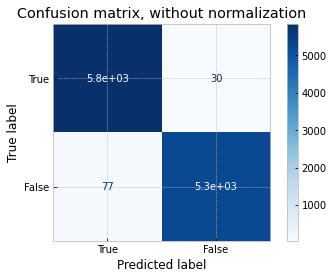

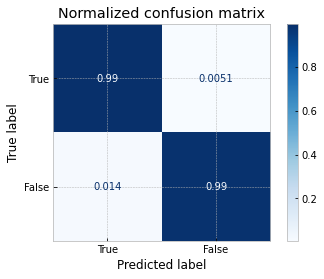

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgb_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest

In [ ]:
# Instantiate model with 30 decision trees
rf = RandomForestClassifier(n_estimators = 30)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# make predictions for test data
y_pred_rf = rf.predict(X_test)
predictions_rf = [round(value) for value in y_pred_rf]

print("RANDOM FOREST: PERFORMANCE METRICS\n\n")

accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

precision_rf = precision_score(y_test, predictions_rf, average=None)
print("Precision: %.2f%%" % (precision_rf[1] * 100.0))

f1score_rf = f1_score(y_test, predictions_rf, average=None)
print("F1 Score: %.2f%%" % (f1score_rf[1] * 100.0))

recall_rf = recall_score(y_test, predictions_rf, average=None)
print("Recall: %.2f%%" % (recall_rf[1] * 100.0))

RANDOM FOREST: PERFORMANCE METRICS


Accuracy: 98.37%
Precision: 98.61%
F1 Score: 98.28%
Recall: 97.96%


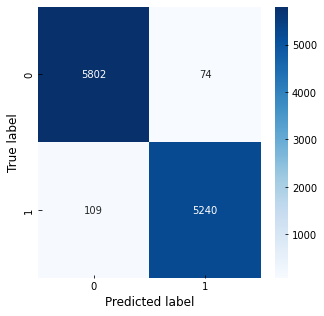

In [ ]:
cm = confusion_matrix(y_test, predictions_rf)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt =".0f", ax=ax,cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## Naive Bayes

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
naive_classifier = Naive.fit(X_train,y_train)

In [ ]:
# make predictions for test data
predictions_NB = Naive.predict(X_test)

print("NAIVE BAYES: PERFORMANCE METRICS\n\n")

accuracy_nb = accuracy_score(y_test, predictions_NB)
print("Accuracy: %.2f%%" % (accuracy_nb * 100.0))

precision_nb = precision_score(y_test, predictions_NB, average=None)
print("Precision: %.2f%%" % (precision_nb[1] * 100.0))

f1score_nb = f1_score(y_test, predictions_NB, average=None)
print("F1 Score: %.2f%%" % (f1score_nb[1] * 100.0))

recall_nb = recall_score(y_test, predictions_NB, average=None)
print("Recall: %.2f%%" % (recall_nb[1] * 100.0))

NAIVE BAYES: PERFORMANCE METRICS


Accuracy: 95.23%
Precision: 95.11%
F1 Score: 94.99%
Recall: 94.88%



Confusion matrix, without normalization
[[5615  261]
 [ 274 5075]]

Normalized confusion matrix
[[0.96 0.04]
 [0.05 0.95]]


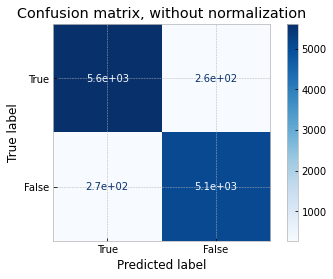

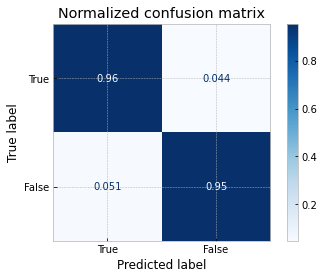

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier = SVM.fit(X_train,y_train)

In [ ]:
# make predictions for test data
predictions_SVM = SVM.predict(X_test)

print("SUPPORT VECTOR MACHINES: PERFORMANCE METRICS\n\n")

accuracy_svm = accuracy_score(y_test, predictions_SVM)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

precision_svm = precision_score(y_test, predictions_SVM, average=None)
print("Precision: %.2f%%" % (precision_svm[1] * 100.0))

f1score_svm = f1_score(y_test, predictions_SVM, average=None)
print("F1 Score: %.2f%%" % (f1score_svm[1] * 100.0))

recall_svm = recall_score(y_test, predictions_SVM, average=None)
print("Recall: %.2f%%" % (recall_svm[1] * 100.0))

SUPPORT VECTOR MACHINES: PERFORMANCE METRICS


Accuracy: 99.48%
Precision: 99.33%
F1 Score: 99.46%
Recall: 99.59%


Confusion matrix, without normalization
[[5840   36]
 [  22 5327]]
Normalized confusion matrix
[[0.99 0.01]
 [0.   1.  ]]


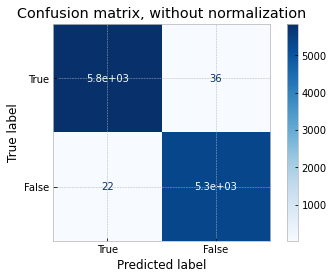

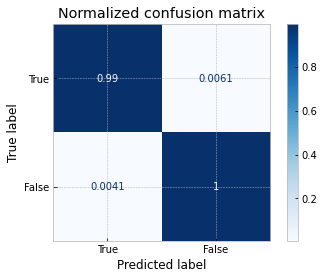

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train,y_train)

In [ ]:
# make predictions for test data
predictions_dt = dt_clf.predict(X_test)

print("DECISION TREE: PERFORMANCE METRICS\n\n")

accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

precision_dt = precision_score(y_test, predictions_dt, average=None)
print("Precision: %.2f%%" % (precision_dt[1] * 100.0))

f1score_dt = f1_score(y_test, predictions_dt, average=None)
print("F1 Score: %.2f%%" % (f1score_dt[1] * 100.0))

recall_dt = recall_score(y_test, predictions_dt, average=None)
print("Recall: %.2f%%" % (recall_dt[1] * 100.0))

DECISION TREE: PERFORMANCE METRICS


Accuracy: 98.67%
Precision: 98.73%
F1 Score: 98.61%
Recall: 98.49%



Confusion matrix, without normalization
[[5808   68]
 [  81 5268]]

Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


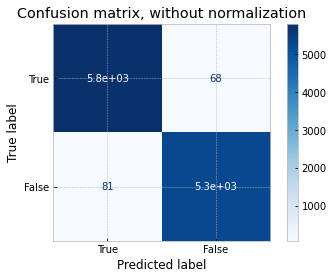

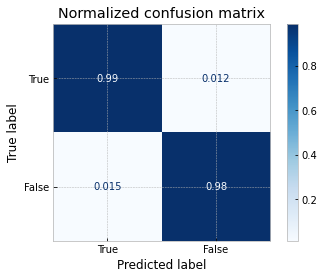

In [ ]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## RNN

In [ ]:
#normalizing the textual data
import re

def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

df['news'] = normalize(df['news'])

#after normalizing
df.sample(5)

,news,label
13297,transparent hillary clinton asked about terror...,0
6604,this university will punish you for being rape...,0
41846,rwanda charge critic president inciting insurr...,1
39160,bolstered libyan coast guard intercept packed ...,1
2957,trump stages photo of himself writing his own ...,0


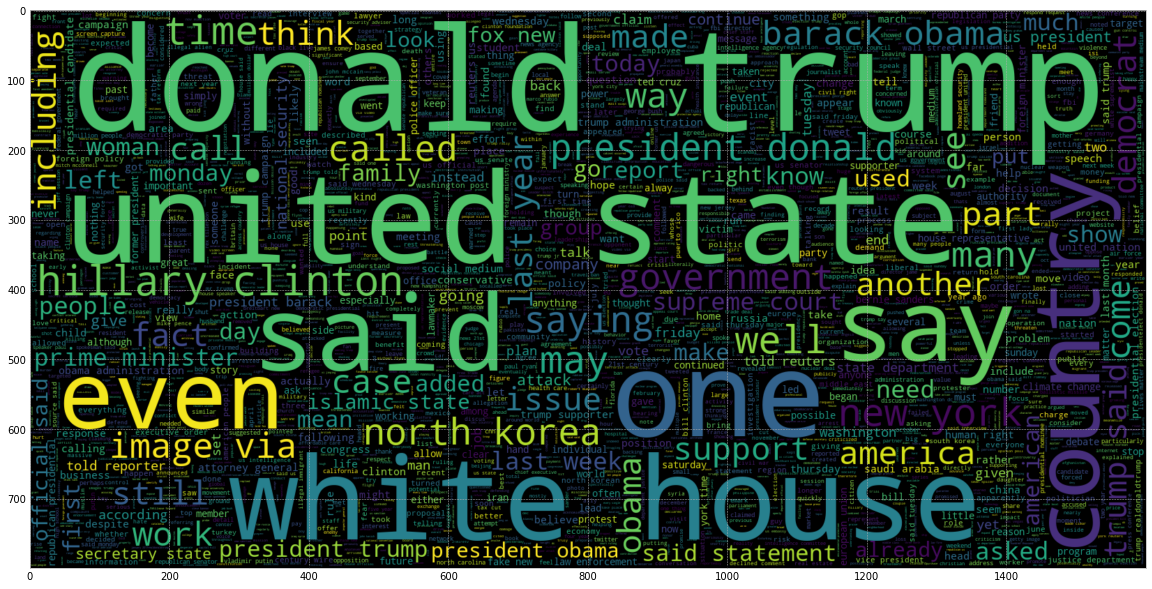

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.news))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
feature = df['news']
target = df['label']

x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(feature, target, test_size=0.20, random_state=18)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_rnn)

In [ ]:
x_train_rnn = tokenizer.texts_to_sequences(x_train_rnn)
x_test_rnn = tokenizer.texts_to_sequences(x_test_rnn)

In [ ]:
x_train_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_train_rnn, padding='post', maxlen=256)
x_test_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_test_rnn, padding='post', maxlen=256)

In [ ]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
__________________________________________________

In [ ]:
model_rnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model_rnn.fit(x_train_rnn, y_train_rnn, epochs=10,validation_split=0.1, batch_size=30, shuffle=True,) 

Epoch 1/10
1078/1078 [==============================] - 470s 430ms/step - loss: 0.2243 - accuracy: 0.8856 - val_loss: 0.0501 - val_accuracy: 0.9841
Epoch 2/10
1078/1078 [==============================] - 471s 437ms/step - loss: 0.0424 - accuracy: 0.9909 - val_loss: 0.0637 - val_accuracy: 0.9858
Epoch 3/10
1078/1078 [==============================] - 470s 436ms/step - loss: 0.0251 - accuracy: 0.9953 - val_loss: 0.0337 - val_accuracy: 0.9911
Epoch 4/10
1078/1078 [==============================] - 470s 436ms/step - loss: 0.0163 - accuracy: 0.9970 - val_loss: 0.0306 - val_accuracy: 0.9925
Epoch 5/10
1078/1078 [==============================] - 468s 434ms/step - loss: 0.0149 - accuracy: 0.9967 - val_loss: 0.0253 - val_accuracy: 0.9936
Epoch 6/10
1078/1078 [==============================] - 472s 438ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 0.0262 - val_accuracy: 0.9944
Epoch 7/10
1078/1078 [==============================] - 473s 439ms/step - loss: 0.0083 - accuracy: 0.9988 - val_

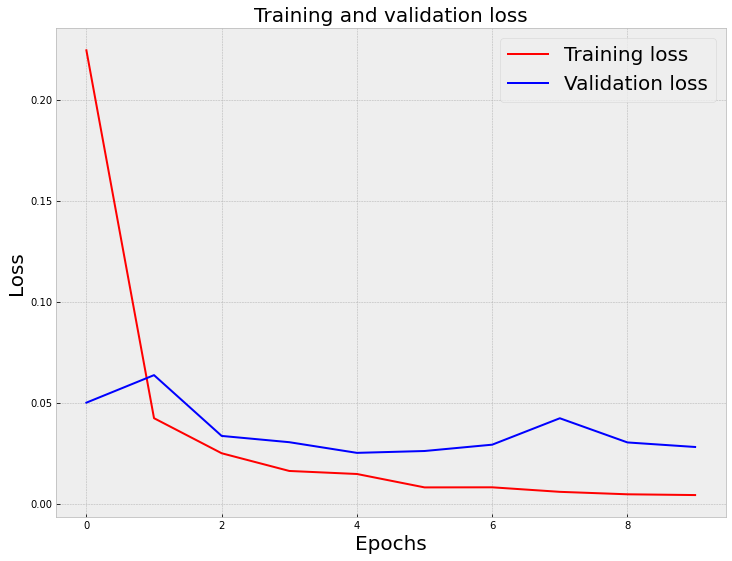

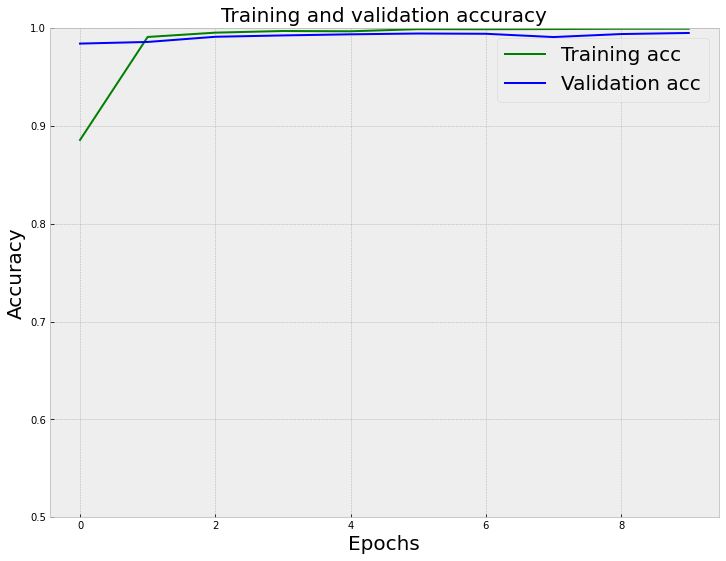

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [ ]:
model_rnn.evaluate(x_test_rnn, y_test_rnn)

281/281 [==============================] - 26s 91ms/step - loss: 0.0285 - accuracy: 0.9939


[0.028498206287622452, 0.99387526512146]

In [ ]:
pred = model_rnn.predict(x_test_rnn)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
print("DECISION TREE: PERFORMANCE METRICS\n\n")

accuracy_rnn = accuracy_score(y_test_rnn, binary_predictions)
print("Accuracy: %.2f%%" % (accuracy_rnn * 100.0))

precision_rnn = precision_score(y_test_rnn, binary_predictions, average=None)
print("Precision: %.2f%%" % (precision_rnn[1] * 100.0))

f1score_rnn = f1_score(y_test_rnn, binary_predictions, average=None)
print("F1 Score: %.2f%%" % (f1score_rnn[1] * 100.0))

recall_rnn = recall_score(y_test_rnn, binary_predictions, average=None)
print("Recall: %.2f%%" % (recall_rnn[1] * 100.0))

DECISION TREE: PERFORMANCE METRICS


Accuracy: 99.39%
Precision: 99.35%
F1 Score: 99.36%
Recall: 99.37%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

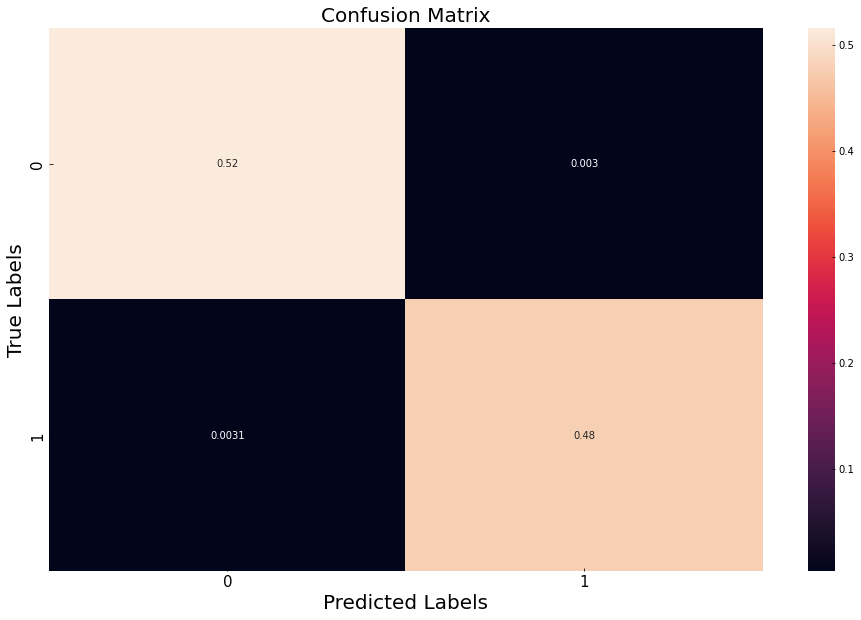

In [ ]:
matrix = confusion_matrix(binary_predictions, y_test_rnn, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

## Comaring the models wrt performance

In [ ]:
var_models = ['Logstic Regression', 'ADA', 'PAC', 'XGB','RF','Naive Bayes','SVM','DT','RNN']

var_accuracy = [accuracy_logistic,accuracy_ada,accuracy_pac,accuracy_xgb,accuracy_rf,accuracy_nb,accuracy_svm,accuracy_dt,accuracy_rnn]
var_precision = [precision_logistic[1],precision_ada[1],precision_pac[1],precision_xgb[1],precision_rf[1],precision_nb[1],precision_svm[1],precision_dt[1],precision_rnn[1]]
var_f1score = [f1score_logistic[1],f1score_ada[1],f1score_pac[1],f1score_xgb[1],f1score_rf[1],f1score_nb[1],f1score_svm[1],f1score_dt[1],f1score_rnn[1]]
var_recall = [recall_logistic[1],recall_ada[1],recall_pac[1],recall_xgb[1],recall_rf[1],recall_nb[1],recall_svm[1],recall_dt[1],recall_rnn[1]]

In [ ]:

metrics = pd.DataFrame({'Models': var_models,'Accuracy': var_accuracy,'Precision': var_precision, 'F1 Score': var_f1score, 'Recall':var_recall})

print("Table of Comparison:\n\n")
metrics 

Table of Comparison:




,Models,Accuracy,Precision,F1 Score,Recall
0,Logstic Regression,0.987973,0.986926,0.987387,0.987848
1,ADA,0.988241,0.987661,0.987661,0.987661
2,PAC,0.995367,0.994585,0.995142,0.995700
3,XGB,0.990468,0.994342,0.989954,0.985605
4,RF,0.983697,0.986075,0.982838,0.979622
5,Naive Bayes,0.952339,0.951087,0.949930,0.948775
6,SVM,0.994833,0.993287,0.994586,0.995887
7,DT,0.986726,0.987256,0.986055,0.984857
8,RNN,0.993875,0.993517,0.993632,0.993747


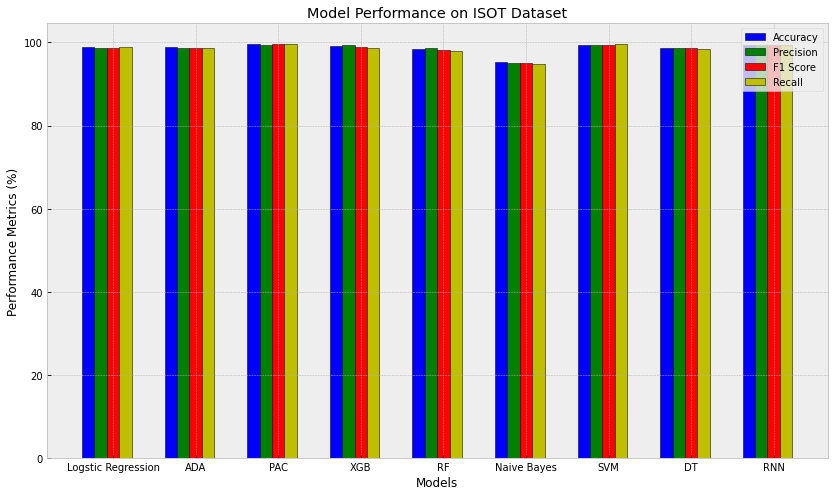

In [ ]:
plt.figure(figsize=(14,8))
n= len(var_models)
r = np.arange(n)
width = 0.15

plt.bar(r, [i*100 for i in var_accuracy], color = 'b',
        width = width, edgecolor = 'black',
        label='Accuracy')
plt.bar(r + width, [i*100 for i in var_precision], color = 'g',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width*2,  [i*100 for i in var_f1score], color = 'r',
        width = width, edgecolor = 'black',
        label='F1 Score')
plt.bar(r + width*3,  [i*100 for i in var_recall], color = 'y',
        width = width, edgecolor = 'black',
        label='Recall')

plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Model Performance on ISOT Dataset")

plt.xticks(r + width*2,var_models)
plt.legend()
  
plt.show()

<Figure size 1008x720 with 0 Axes>

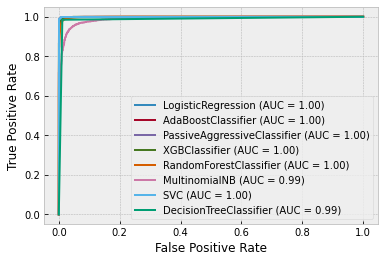

In [ ]:
#plotting the roc curve
plt.figure(figsize=(14,10))
disp = plot_roc_curve(logistic_regression,X_test,y_test)
plot_roc_curve(ada_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(pac_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(naive_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt_clf,X_test,y_test,ax=disp.ax_)
plt.show()